In [1]:
import numpy as np
import pandas as pd
from easypreprocessing import EasyPreProcessing
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

Easypreprocessing is a library used for common ML related preprocessing activities.

In [3]:
prep = EasyPreProcessing('data.csv')


**Initialization Parameters**

1.  output            - Set output variable/dependent variable
2.  dates.features    - Set datetime field names (optional)

For example:
1.  output = 'column_name'
2.  dates.features = ['date_field_1','date_field_2']
        

# Handling Null Values

In [4]:
prep.categorical.fields

['week']

In [5]:
prep.numerical.fields

['record_ID',
 'store_id',
 'sku_id',
 'total_price',
 'base_price',
 'is_featured_sku',
 'is_display_sku',
 'units_sold']

In [6]:
prep.missing_values

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [7]:
prep.numerical.impute()

Numerical features imputated successfully.


In [8]:
prep.missing_values

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [9]:
prep.df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1.0,17/01/11,8091.0,216418.0,99.0375,111.8625,0.0,0.0,20.0
1,2.0,17/01/11,8091.0,216419.0,99.0375,99.0375,0.0,0.0,28.0
2,3.0,17/01/11,8091.0,216425.0,133.9500,133.9500,0.0,0.0,19.0
3,4.0,17/01/11,8091.0,216233.0,133.9500,133.9500,0.0,0.0,44.0
4,5.0,17/01/11,8091.0,217390.0,141.0750,141.0750,0.0,0.0,52.0
...,...,...,...,...,...,...,...,...,...
150145,212638.0,09/07/13,9984.0,223245.0,235.8375,235.8375,0.0,0.0,38.0
150146,212639.0,09/07/13,9984.0,223153.0,235.8375,235.8375,0.0,0.0,30.0
150147,212642.0,09/07/13,9984.0,245338.0,357.6750,483.7875,1.0,1.0,31.0
150148,212643.0,09/07/13,9984.0,547934.0,141.7875,191.6625,0.0,1.0,12.0


Create a new column 'key' for unique identification. This is done in order to handle the duplicate data in 'week' column.

In [10]:
prep.dataset['key'] = prep.df['week'].astype(str) + '_' + prep.df['store_id'].astype(str) 
prep.dataset['price'] = (prep.df['total_price'].astype(float) + prep.df['base_price'].astype(float))/2 

In [11]:
prep.df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,key,price
0,1.0,17/01/11,8091.0,216418.0,99.0375,111.8625,0.0,0.0,20.0,17/01/11_8091.0,105.45000
1,2.0,17/01/11,8091.0,216419.0,99.0375,99.0375,0.0,0.0,28.0,17/01/11_8091.0,99.03750
2,3.0,17/01/11,8091.0,216425.0,133.9500,133.9500,0.0,0.0,19.0,17/01/11_8091.0,133.95000
3,4.0,17/01/11,8091.0,216233.0,133.9500,133.9500,0.0,0.0,44.0,17/01/11_8091.0,133.95000
4,5.0,17/01/11,8091.0,217390.0,141.0750,141.0750,0.0,0.0,52.0,17/01/11_8091.0,141.07500
...,...,...,...,...,...,...,...,...,...,...,...
150145,212638.0,09/07/13,9984.0,223245.0,235.8375,235.8375,0.0,0.0,38.0,09/07/13_9984.0,235.83750
150146,212639.0,09/07/13,9984.0,223153.0,235.8375,235.8375,0.0,0.0,30.0,09/07/13_9984.0,235.83750
150147,212642.0,09/07/13,9984.0,245338.0,357.6750,483.7875,1.0,1.0,31.0,09/07/13_9984.0,420.73125
150148,212643.0,09/07/13,9984.0,547934.0,141.7875,191.6625,0.0,1.0,12.0,09/07/13_9984.0,166.72500


Removing columns that are not helpful for time series predictions.

In [12]:
prep.dataset = prep.df.drop(['record_ID', 'week', 'store_id', 'sku_id', 'is_featured_sku', 'is_display_sku','total_price', 'base_price'], axis=1)

Summing units_sold group by key.

In [13]:
prep.dataset = prep.df.groupby('key').sum()

In [14]:
prep.dataset = prep.df.sort_values('key', ascending=False)

In [15]:
prep.dataset

,units_sold,price
key,,
31/10/11_9984.0,506.0,3388.65000
31/10/11_9961.0,820.0,3750.95625
31/10/11_9954.0,431.0,4077.63750
31/10/11_9909.0,551.0,3151.38750
31/10/11_9890.0,531.0,2633.75625
...,...,...
01/01/13_8094.0,782.0,5124.65625
01/01/13_8091.0,210.0,1577.47500
01/01/13_8063.0,535.0,4109.70000


<AxesSubplot:xlabel='key'>

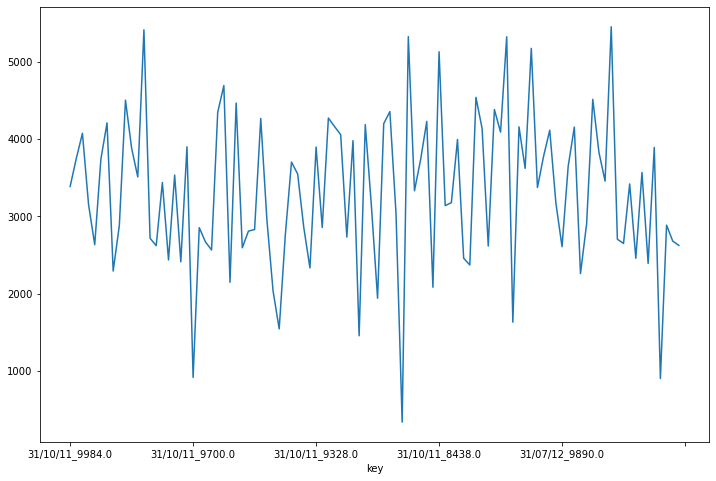

In [16]:
prep.dataset.iloc[:,1][:100].plot(figsize=(12,8))

# Converting supervised dataset

```units_sold``` becomes target variable

```day_1```, ```day_2```, ```day_3```, ```day_4``` becomes input

We will train our model to predict sales based on previous 4 days.

In [17]:
prep.dataset['day_1'] = prep.dataset['units_sold'].shift(-1)
prep.dataset['day_2'] = prep.dataset['units_sold'].shift(-2)
prep.dataset['day_3'] = prep.dataset['units_sold'].shift(-3)
prep.dataset['day_4'] = prep.dataset['units_sold'].shift(-4)

In [18]:
prep.dataset

,units_sold,price,day_1,day_2,day_3,day_4
key,,,,,,
31/10/11_9984.0,506.0,3388.65000,820.0,431.0,551.0,531.0
31/10/11_9961.0,820.0,3750.95625,431.0,551.0,531.0,908.0
31/10/11_9954.0,431.0,4077.63750,551.0,531.0,908.0,698.0
31/10/11_9909.0,551.0,3151.38750,531.0,908.0,698.0,292.0
31/10/11_9890.0,531.0,2633.75625,908.0,698.0,292.0,363.0
...,...,...,...,...,...,...
01/01/13_8094.0,782.0,5124.65625,210.0,535.0,682.0,2025.0
01/01/13_8091.0,210.0,1577.47500,535.0,682.0,2025.0,NaN
01/01/13_8063.0,535.0,4109.70000,682.0,2025.0,NaN,NaN


### Filling NA data

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(prep.dataset.iloc[:, 2:])
prep.dataset.iloc[:, 2:]=imputer.transform(prep.dataset.iloc[:, 2:])
prep.dataset.iloc[:, 2:]

,day_1,day_2,day_3,day_4
key,,,,
31/10/11_9984.0,820.0,431.0,551.0,531.0
31/10/11_9961.0,431.0,551.0,531.0,908.0
31/10/11_9954.0,551.0,531.0,908.0,698.0
31/10/11_9909.0,531.0,908.0,698.0,292.0
31/10/11_9890.0,908.0,698.0,292.0,363.0
...,...,...,...,...
01/01/13_8094.0,210.0,535.0,682.0,2025.0
01/01/13_8091.0,535.0,682.0,2025.0,678.0
01/01/13_8063.0,682.0,2025.0,678.0,678.0


In [20]:
df=prep.dataset

In [21]:
print(df)

                 units_sold       price   day_1   day_2   day_3   day_4
key                                                                    
31/10/11_9984.0       506.0  3388.65000   820.0   431.0   551.0   531.0
31/10/11_9961.0       820.0  3750.95625   431.0   551.0   531.0   908.0
31/10/11_9954.0       431.0  4077.63750   551.0   531.0   908.0   698.0
31/10/11_9909.0       551.0  3151.38750   531.0   908.0   698.0   292.0
31/10/11_9890.0       531.0  2633.75625   908.0   698.0   292.0   363.0
...                     ...         ...     ...     ...     ...     ...
01/01/13_8094.0       782.0  5124.65625   210.0   535.0   682.0  2025.0
01/01/13_8091.0       210.0  1577.47500   535.0   682.0  2025.0   678.0
01/01/13_8063.0       535.0  4109.70000   682.0  2025.0   678.0   678.0
01/01/13_8058.0       682.0  3418.21875  2025.0   678.0   678.0   678.0
01/01/13_8023.0      2025.0  5126.43750   678.0   678.0   678.0   678.0

[9880 rows x 6 columns]


<AxesSubplot:xlabel='key'>

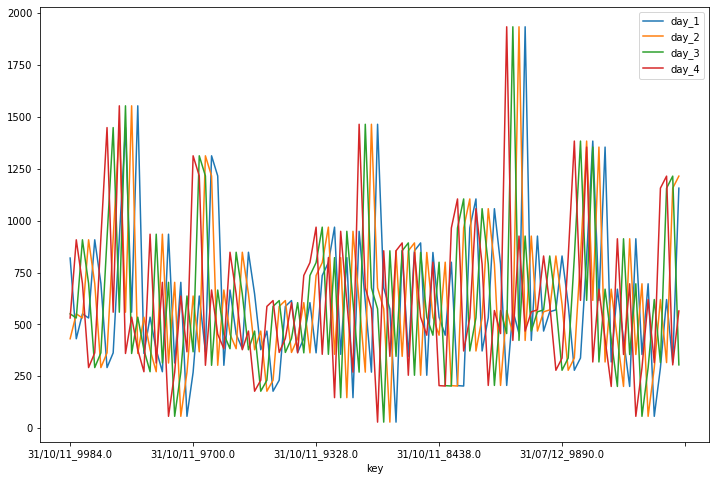

In [22]:
df.iloc[:, 2:][:100].plot(figsize=(12,8))

# Train-Test Split

In [23]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7904, 5)
(1976, 5)
(7904,)
(1976,)


In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train= ss.fit_transform(X_train)
X_test= ss.fit_transform(X_test)

# Artificial Neural Network

In [26]:
ann = Sequential()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-27 09:50:50.598154: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-27 09:50:50.598252: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [27]:
ann.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'normal', input_dim = X_train.shape[1])) #input_dim:Number of Input Features
ann.add(Dense(units = 512, activation = 'relu', kernel_initializer = 'normal'))
ann.add(Dense(units = 256, activation = 'relu', kernel_initializer = 'normal'))
ann.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'normal'))
ann.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'normal'))
ann.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'normal'))
#kernel_initializer:used to statistically initialise the weights in the model

In [28]:
ann.add(Dense(units = 1))

In [29]:
mse = MeanSquaredError()
ann.compile(optimizer = Adam(learning_rate = 0.01), loss = mse, metrics = [mse])

In [30]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 512)               66048     
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 64)                16448     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 8)                 264       
                                                                 
 dense_6 (Dense)             (None, 1)                 9

In [31]:
history = ann.fit(X_train, y_train, batch_size = 64, epochs = 300, validation_split = 0.2)

Epoch 1/300


2022-07-27 09:50:50.830451: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-27 09:50:51.002454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 1s 10ms/step - loss: 211682.4219 - mean_squared_error: 211735.9062 - val_loss: 145352.1875 - val_mean_squared_error: 145062.3438
Epoch 2/300
 8/99 [=>............................] - ETA: 0s - loss: 141984.6406 - mean_squared_error: 141984.6406

2022-07-27 09:50:52.010767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 1s 9ms/step - loss: 133506.4531 - mean_squared_error: 133498.7812 - val_loss: 147032.3438 - val_mean_squared_error: 146685.4375
Epoch 3/300
99/99 [==============================] - 1s 9ms/step - loss: 127401.0000 - mean_squared_error: 127335.5156 - val_loss: 134526.8594 - val_mean_squared_error: 134235.5625
Epoch 4/300
99/99 [==============================] - 1s 8ms/step - loss: 121812.8125 - mean_squared_error: 121866.6094 - val_loss: 126438.3906 - val_mean_squared_error: 125990.3047
Epoch 5/300
99/99 [==============================] - 1s 8ms/step - loss: 107505.5234 - mean_squared_error: 107479.2344 - val_loss: 119399.0234 - val_mean_squared_error: 118859.8359
Epoch 6/300
99/99 [==============================] - 1s 8ms/step - loss: 95802.7578 - mean_squared_error: 95769.6328 - val_loss: 100752.5312 - val_mean_squared_error: 100264.3516
Epoch 7/300
99/99 [==============================] - 1s 8ms/step - loss: 96344.1172 - mean_squared_error: 962

In [32]:
y_pred = ann.predict(X_test)

2022-07-27 09:54:55.933901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8160417954368564

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

44053.993737228295

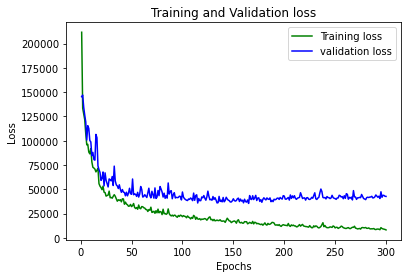

In [39]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,301)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

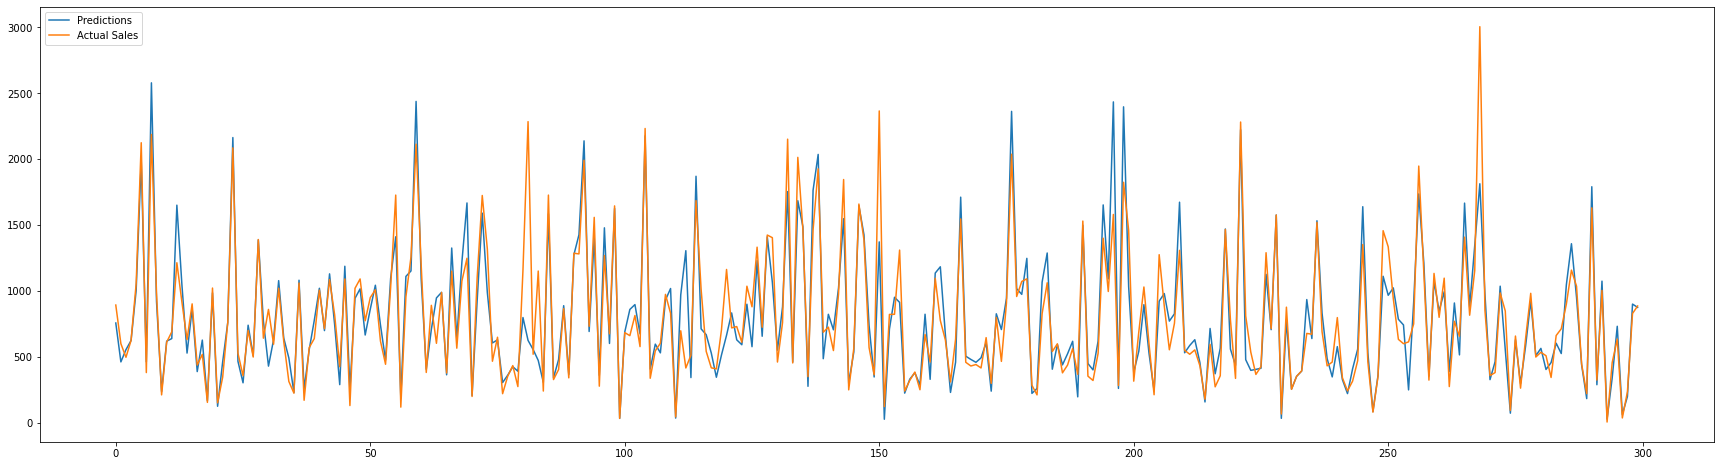

In [40]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,8)
plt.plot(y_pred[500:800], label='Predictions')
plt.plot(y_test[500:800], label='Actual Sales')
plt.legend(loc="upper left")
plt.show()